In [2]:
from IPython.display import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd

### **Keras Applications**

Ver más: https://keras.io/api/applications/

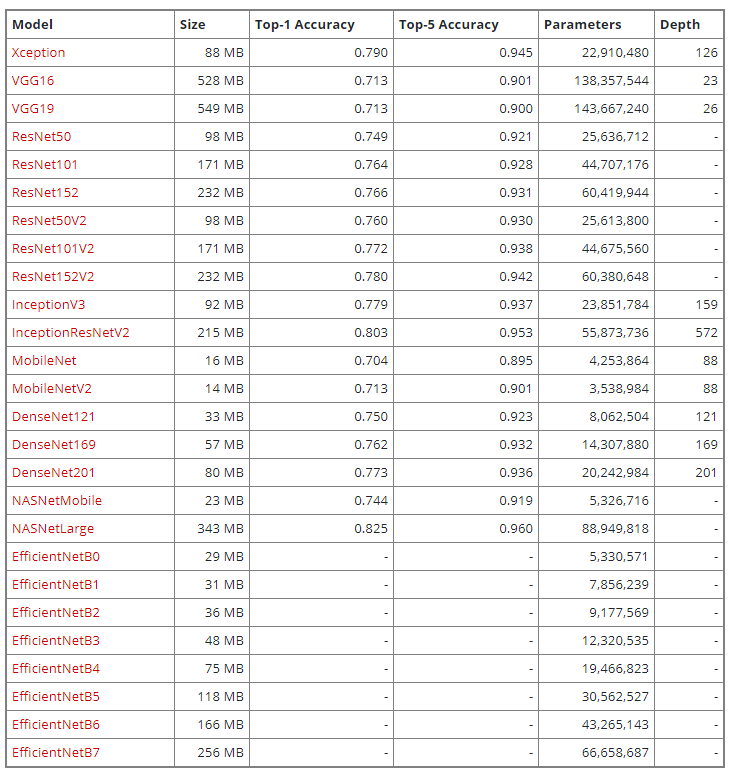

In [5]:
#@title Cargar modelo pre-entrenado  { run: "auto" }
model_name = "InceptionV3" #@param ["VGG16", "ResNet50", "VGG19", "InceptionV3", "DenseNet121", "NASNetLarge"]
if model_name == "ResNet50":
  from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
  model = ResNet50(weights='imagenet')
  target_size=(224, 224)
if model_name == "VGG16":
  from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
  model = VGG16(weights='imagenet')
  target_size=(224, 224)
if model_name == "VGG19":
  from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input, decode_predictions
  model = VGG19(weights='imagenet')
  target_size=(224, 224)
if model_name == "InceptionV3":
  from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
  model = InceptionV3(weights='imagenet')
  target_size=(299, 299)
if model_name == "DenseNet121":
  from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions
  model = DenseNet121(weights='imagenet')
  target_size=(224, 224)
if model_name == "NASNetLarge":
  from tensorflow.keras.applications.nasnet import NASNetLarge, preprocess_input, decode_predictions
  model = NASNetLarge(weights='imagenet')
  target_size=(331, 331)
print("Modelo cargado: {}".format(model.name))

Modelo cargado: inception_v3


### **Mostrar Modelo**

In [10]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalizati

### **Cargar imagen de prueba 🐘🖼️**

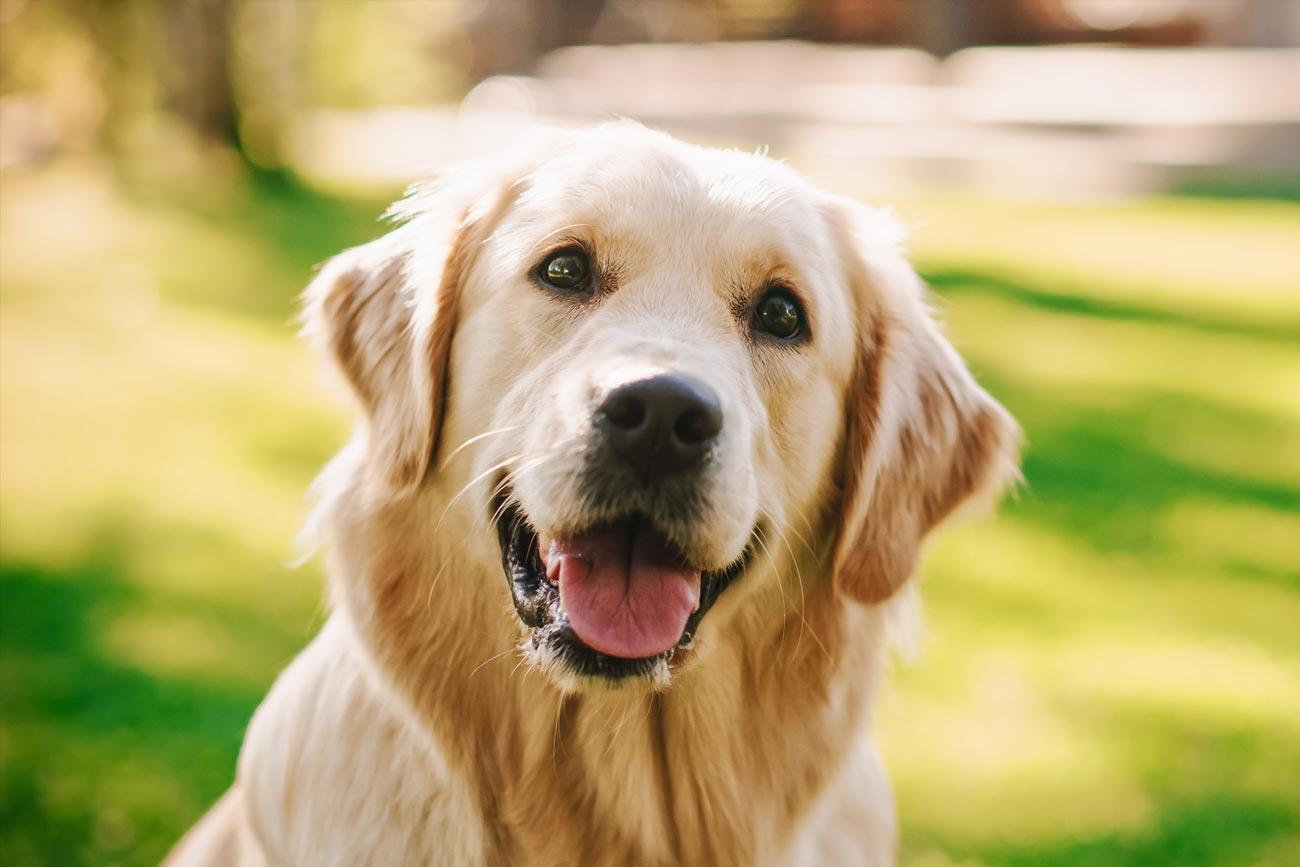

In [14]:
import wget
url = 'https://www.fundacion-affinity.org/sites/default/files/los-10-sonidos-principales-del-perro.jpg'
img_path = wget.download(url)
display(Image(img_path))

In [16]:
img = image.load_img(img_path, target_size=target_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
pd.DataFrame(decode_predictions(preds, top=10)[0]).iloc[:,1:]

1/1 [==============================] - 0s 113ms/step


,1,2
0,golden_retriever,0.794958
1,kuvasz,0.015757
2,Labrador_retriever,0.008594
3,Great_Pyrenees,0.007678
4,clumber,0.005314
5,tennis_ball,0.004479
6,Leonberg,0.003399
7,Border_collie,0.002231
8,Newfoundland,0.002083
9,flat-coated_retriever,0.002044
